In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)


2024-05-04 13:36:19.721870: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.13.1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)



In [4]:
np.random.seed(42)
tf.random.set_seed(42)

In [7]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1389221534261837824.0000 - val_loss: 679094660366336.0000
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 358828545671168.0000 - val_loss: 158746235895808.0000
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 83880149254144.0000 - val_loss: 37108597129216.0000
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 19607932895232.0000 - val_loss: 8674559918080.0000
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 4583575781376.0000 - val_loss: 2027778473984.0000
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 1071463464960.0000 - val_loss: 474017464320.0000
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 250466861056.0000 - val_loss: 110807031808.0000
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 58549518336.0000 - val_loss: 25902381056.0000


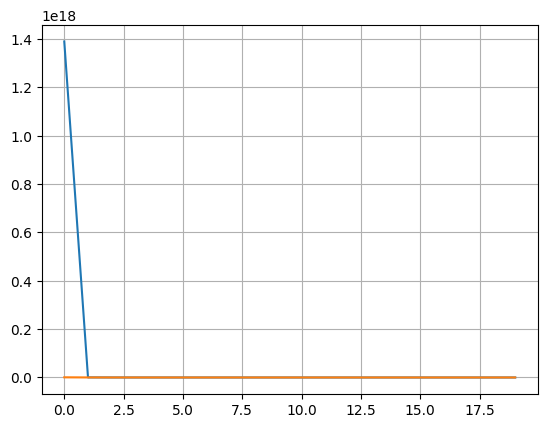

In [8]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.show()

# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych.

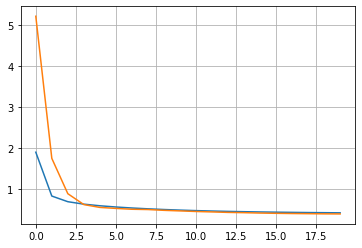

# Dane zawsze muszą być przeskalowane